In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/winequalityN.csv' )
df = df.drop('type',axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Splitting the data set into training & testing
X = df[['alcohol']]
y = df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Now We will create a Linear model
lr = LinearRegression()
lr.fit(X_train,y_train)



# Now we will create a Polynomial Model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

pr = LinearRegression()
pr.fit(X_poly_train,y_train)

LinearRegression()

In [ ]:
# Now we are predecting
y_pred_lr = lr.predict(X_test)
y_pred_pr = pr.predict(X_poly_test)


In [ ]:
#Printing Performance Metrics for both Models
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print('Performance Of Linear Regression Model:')
mse_lr=mean_squared_error(y_test,y_pred_lr)
print('Mean Squared Error:',mse_lr)
print('Root Mean Squared Error:',np.sqrt(mse_lr))
print('R-squared',r2_score(y_test,y_pred_lr))


print('\n\nPerformance Of Polynomial Linear Regression Model:')
mse_pr=mean_squared_error(y_test,y_pred_pr)
print('Mean Squared Error:',mse_pr)
print('Root Mean Squared Error:',np.sqrt(mse_pr))
print('R-squared',r2_score(y_test,y_pred_pr))



Performance Of Linear Regression Model:
Mean Squared Error: 0.611485163050556
Root Mean Squared Error: 0.7819751677966226
R-squared 0.20926081398108975


Performance Of Polynomial Linear Regression Model:
Mean Squared Error: 0.6135286456805131
Root Mean Squared Error: 0.7832806940557856
R-squared 0.2066182939510126


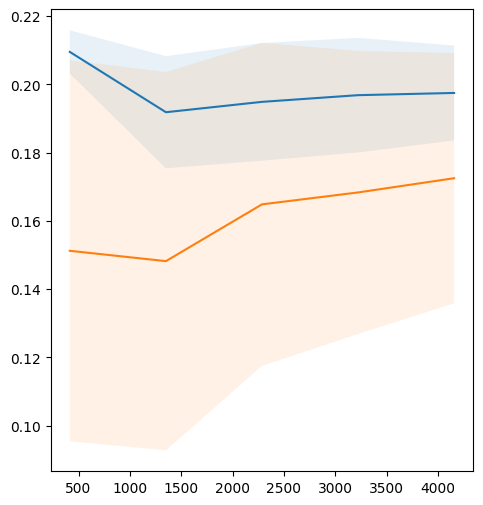

In [ ]:
# Plotting Learning Curves FOr both the model
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_sizes, train_scores_lin, test_scores_lin = learning_curve(lr, X, y, cv=5)
train_sizes, train_scores_poly, test_scores_poly = learning_curve(pr, X_poly_train, y_train, cv=5)
train_mean_lin = np.mean(train_scores_lin, axis=1)
train_std_lin = np.std(train_scores_lin, axis=1)
test_mean_lin = np.mean(test_scores_lin, axis=1)
test_std_lin = np.std(test_scores_lin, axis=1)
train_mean_poly = np.mean(train_scores_poly, axis=1)
train_std_poly = np.std(train_scores_poly, axis=1)
test_mean_poly = np.mean(test_scores_poly, axis=1)
test_std_poly = np.std(test_scores_poly, axis=1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(train_sizes, train_mean_lin, label='Training score')
plt.plot(train_sizes, test_mean_lin, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean_lin - train_std_lin, train_mean_lin + train_std_lin, alpha=0.1)
plt.fill_between(train_sizes, test_mean_lin - test_std_lin, test_mean_lin + test_std_lin, alpha=0.1)
plt.show()


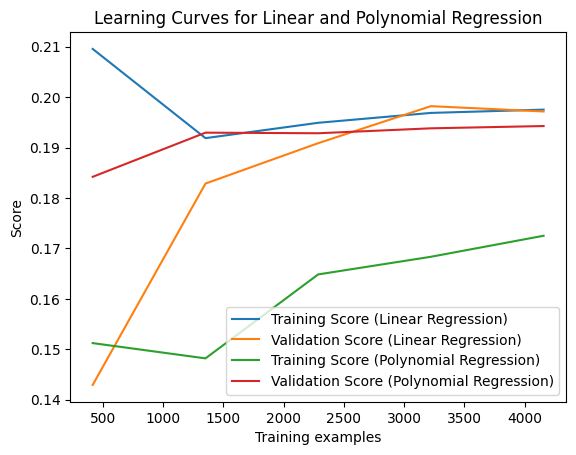

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning curves for Linear Regression
plt.plot(train_sizes, train_mean_lin, label='Training Score (Linear Regression)')
plt.plot(train_sizes, train_mean_poly, label='Validation Score (Linear Regression)')

# Plot the learning curves for Polynomial Regression
plt.plot(train_sizes, test_mean_lin, label='Training Score (Polynomial Regression)')
plt.plot(train_sizes, test_mean_poly, label='Validation Score (Polynomial Regression)')

# Set the plot title and labels
plt.title("Learning Curves for Linear and Polynomial Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Set the legend
plt.legend(loc="best")

# Show the plot
plt.show()
